<a href="https://colab.research.google.com/github/samruddhi9049/Project1/blob/main/final_team_capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

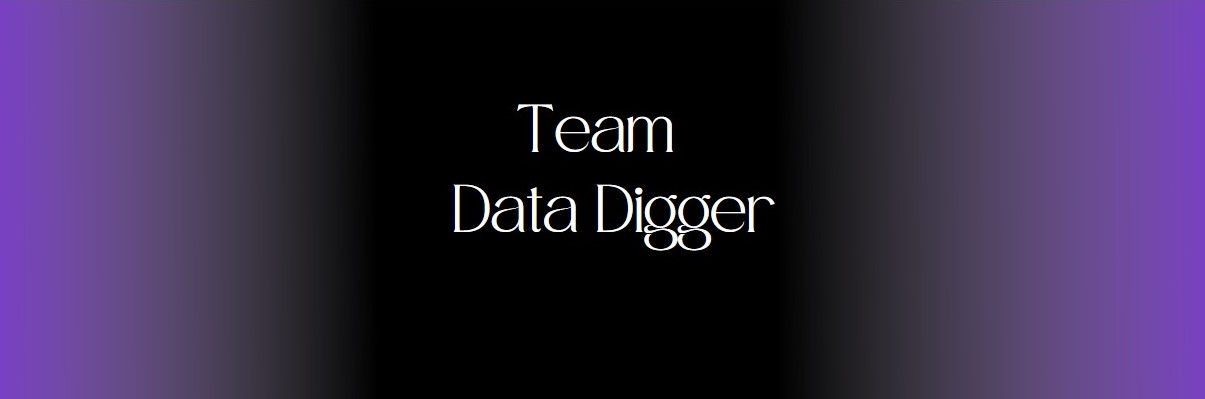

**introduction :  Over the past 20 years, advances in digital technologies have driven numerous innovations and disruptions in the Hotel industry These technologies and the companies that offer them have rearranged the industry, leaving some players behind—travel agents,offline tour bookings for example—while introducing more complexity into the value chain between travelers and hospitability provider. As we humans started to  spend our most time near or on our phone surfing on internet , techonlogy has also enabled businesses to expand thier conventional customer base and innovate new services based on thier diverse customer demand  ,what enable businesses to do such actions based on cutsomer choices ,neglegance,feedback is the  solid knowledge of customer choices and behavioural pattern and no doubt analysis of data accumlated from customer plays pivotal role in this.  In these capstone project of almabetter year 2022 ,I have analysed data baased on several factors which grant its benifits to businesses as well as to customers , now without further due lets get yourself aquainted to tools and approch I've used for analysing this data to provide better insight**

**Note:in this colab notebook without ambiguity mpl refer to the matplotlib package of python**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt #matplotlib(python visualization package or library) pyplot is python module in matplotlib 
import matplotlib as mpl #matplotlib package
import matplotlib.animation as animation #animation module from mpl package
import matplotlib.axis as axs #axis module from mpl package
import pandas as pd #pandas package of python
import numpy as np #python's package for scientific computing
import seaborn as sns

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv'

In [ ]:
hotel_booking_df=pd.read_csv(path)

#Data Exploration and Data Cleaning

In [ ]:
#show upper rows
hotel_booking_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
#Show bottom rows
hotel_booking_df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

In [ ]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking_df[hotel_booking_df.duplicated()]

hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July                        27   
138                  July                        28   
200                  July                        28   
...                   ...                       ...   
119349             August                        35   
119352             August                        35   
119353             August                        35   
119354             August                        35   
119373             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
5                               1                        0   
22                              1                        2   
43                              2                        2   
138                             5                        1   
200                             7                        0   
...                           ...                      ...   
119349                         31                        0   
119352                         31                        0   
119353                         31                        0   
119354                         31                        0   
119373                         31                        1   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
5                          2       2  ...    No Deposit  240.0     NaN   
22                         4       2  ...    No Deposit  250.0     NaN   
43                         3       2  ...    No Deposit  250.0     NaN   
138                        0       2  ...    No Deposit  240.0     NaN   
200                        1       1  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119349                     3       2  ...    No Deposit    9.0     NaN   
119352                     3       3  ...    No Deposit    9.0     NaN   
119353                     3       3  ...    No Deposit    9.0     NaN   
119354                     3       3  ...    No Deposit    9.0     NaN   
119373                     3       1  ...    No Deposit   42.0     NaN   

       days_in_waiting_list    customer_type     adr  \
5                         0        Transient   98.00   
22                        0        Transient   84.67   
43                        0        Transient  137.00   
138                       0        Transient   97.00   
200                       0        Transient  109.80   
...                     ...              ...     ...   
119349                    0        Transient  126.00   
119352                    0  Transient-Party  195.33   
119353                    0  Transient-Party  195.33   
119354                    0  Transient-Party  195.33   
119373                    0        Transient   82.35   

        required_car_parking_spaces  total_of_special_requests  \
5                                 0                          1   
22                                0                          1   
43                                0         

In [ ]:
hotel_booking_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# converting object type to datetime
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'], format = '%Y-%m-%d')

# **Data Description:**

1.hotel : Hotel(Resort Hotel or City Hotel)

2.is_canceled : Value indicating if the booking was canceled (1) or not (0)

3.lead_time :* Number of days that elapsed between the entering date of the   booking into the PMS and the arrival date*

4.arrival_date_year : Year of arrival date

5.arrival_date_month : Month of arrival date

6.arrival_date_day_of_month : Day of arrival date

7.arrival_date_week_number : Week number of year for arrival date

8.stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.stays_in_week_nights : Number of week nights (Monday to Friday) the guest   stayed or booked to stay at the hotel

10.children : Number of children

11.adults : Number of adults

12.babies : Number of babies

13.meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

14.market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”`

15.country : Country of origin.`

16.distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18.reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20.previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

21.choosen_room_type : Code for the type of room assigned to the booking.

22.booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23.deposit_type : Indication on if the customer made a deposit to guarantee the booking.

24.agent : ID of the travel agency that made the booking

25.company : ID of the company/entity that made the booking or responsible for paying the booking.

26.days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27.customer_type : Type of booking, assuming one of four categories

28.adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29.required_car_parking_spaces : Number of car parking spaces required by the customer

30.total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed )*

31.reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

32.reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Information – customer did not check-in and did inform the hotel of the reason why

## **Data** **Cleaning** 

In [ ]:
# checking for the duplicate rows
hotel_booking_df.duplicated().value_counts()  

False    87396
True     31994
dtype: int64

**Note:True means duplicated values**

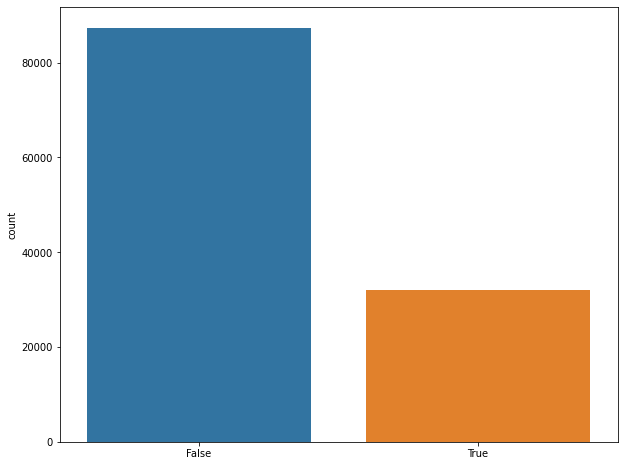

In [ ]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=hotel_booking_df.duplicated())


In [ ]:
hotel_booking_df= hotel_booking_df.drop_duplicates()

In [ ]:
hotel_booking_df.shape

(87396, 32)

In [ ]:
#checking for Null Values
hotel_booking_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0             company        82137
1               agent        12193
2             country          452
3            children            4
4  reserved_room_type            0
5  assigned_room_type            0

Text(0.5, 1.0, 'Places of missing values in column')

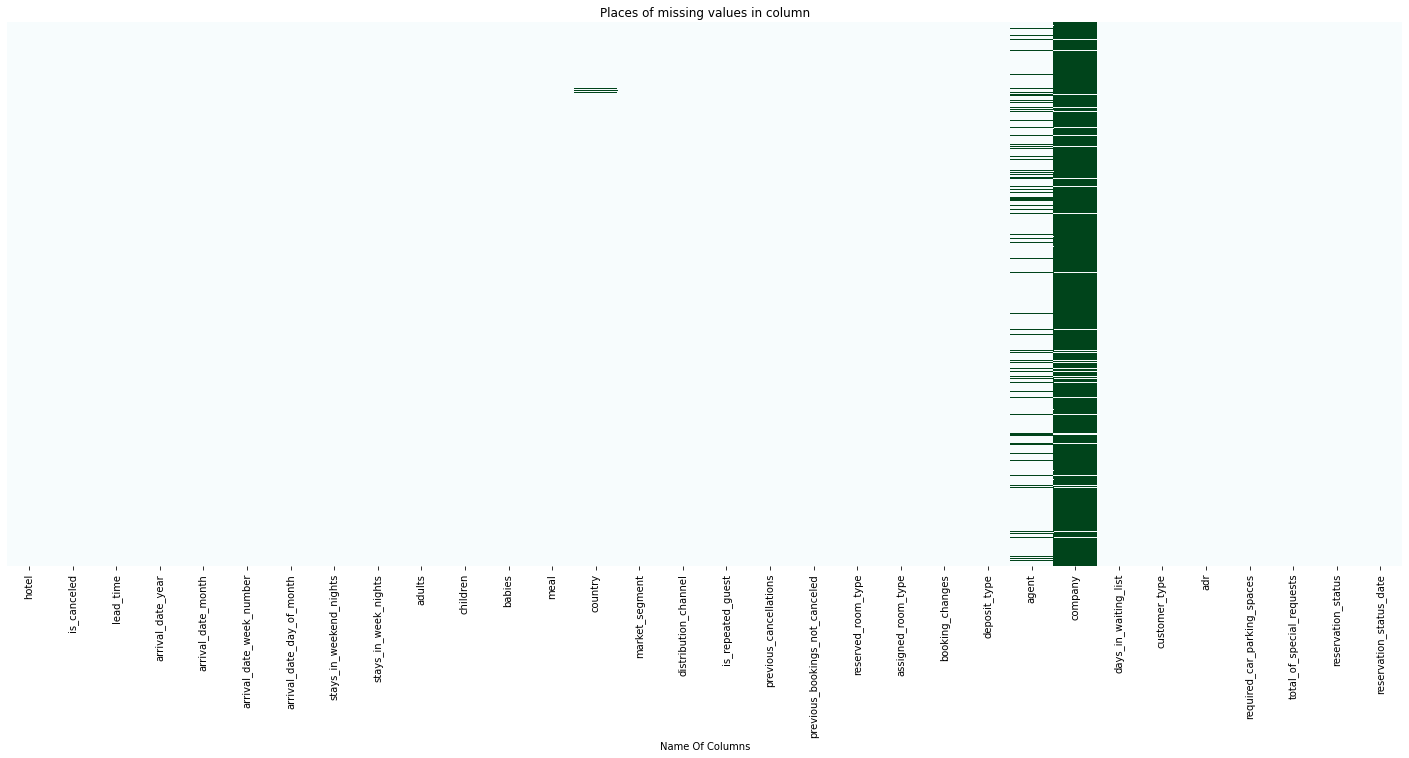

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(hotel_booking_df.isnull(), cbar=False, yticklabels=False,cmap=plt.cm.BuGn)
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  hotel_booking_df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
hotel_booking_df['country'].fillna('others',inplace=True)

In [ ]:
hotel_booking_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0                        hotel            0
1                  is_canceled            0
2           reservation_status            0
3    total_of_special_requests            0
4  required_car_parking_spaces            0
5                          adr            0

In [ ]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children']==0])
hotel_booking_df.drop(hotel_booking_df[hotel_booking_df['adults']+hotel_booking_df['babies']+hotel_booking_df['children']==0].index,inplace=True)

In [ ]:
# Checking the unique values in categorical columns.
categorical_columns=list(set(hotel_booking_df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(hotel_booking_df.describe()))
for col in categorical_columns:
  print(f'Unique values in column {col} are:, {(hotel_booking_df[col].unique())}')

Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']


#Total Population Proportion


In [ ]:
proportion=hotel_booking_df.filter(["adults","children","babies"])

In [ ]:
proportion

adults  children  babies
0            2       0.0       0
1            2       0.0       0
2            1       0.0       0
3            1       0.0       0
4            2       0.0       0
...        ...       ...     ...
119385       2       0.0       0
119386       3       0.0       0
119387       2       0.0       0
119388       2       0.0       0
119389       2       0.0       0

[87230 rows x 3 columns]

In [ ]:
total_adults=proportion["adults"].sum()
total_children=proportion["children"].sum()
total_babies=proportion["babies"].sum()

In [ ]:
customer_count=pd.DataFrame({"total_adults":[total_adults], "total_children":[total_children],"total_babies":[total_babies]})


   total_adults  total_children  total_babies
0        163937         12116.0           946


In [ ]:
customer_count

total_adults  total_children  total_babies
0        163937         12116.0           946

In [ ]:
#caclulating percentage
grand_sum=total_adults+total_children+total_babies
percentage_of_adults=((total_adults)/(grand_sum))*100
percentage_of_children=((total_children)/(grand_sum))*100
percentage_of_babies=((total_babies)/(grand_sum))*100

In [ ]:
grand_sum

176999.0

**pie chart**

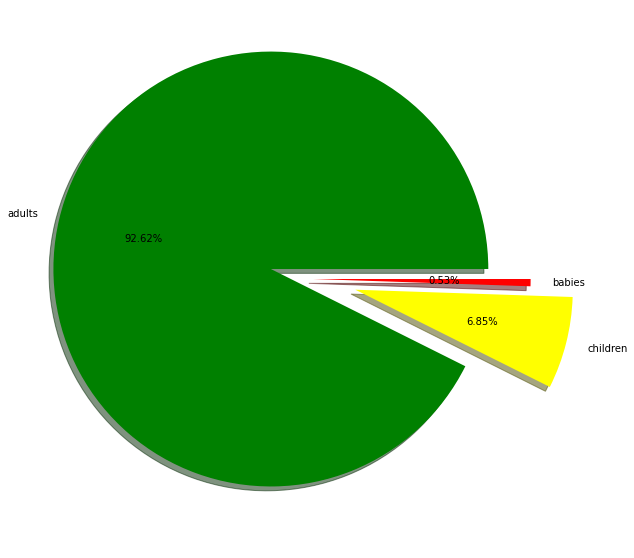

In [ ]:
plt.figure(figsize=(60,10))
plot=plt.pie([percentage_of_adults,percentage_of_children,percentage_of_babies],shadow=True,explode=[0.2,0.2,0],colors=["green","yellow","red"],labels=["adults","children","babies"],autopct='%2.2f%%')
plt.show()


Conclusion
>Data consist of 92.62% of adults ,6.85% of children and only 0.53% of babies

#Best time to Book a room in hotel

**Problem Statement  : Just imagine getting to the hotel and finding no room is available and there is no nearby hotel either okay lets add more pity to this you are with your family , okay let me be a ruthless now ,its 11 O'clock of night , you are frustrated because recptionist has told you that in this months of year hotel get more traffic than usual and that's why there is no room , and doesn't that also mean that you are less likely to get hotel for this whole freaking month ? you try to get over from your outrage against hotel industry abruptly one wise thought came into your mind. what could have saved you from this terrible situation ?**
**yes your are absolutely right if you would have taken into account the traffic variation in different months of years you could've been in different position**

***Problem First : Getting the variation of traffic on month to month basis***

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml') #for giving aniamtion to graphs in colab

Step 1:**making data frame from pandas to use it like a spreadsheet**


In [ ]:
hotel_booking_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

**Step 2:Use pandas groupby() method to group the arrival_of _month  on the basis of number of bookings done**

In [ ]:
per_month_traffic=hotel_booking_df.groupby(["arrival_date_month"])["arrival_date_month"].count()

In [ ]:
per_month_traffic

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

In [ ]:

fig1, plot_per_month_traffic = plt.subplots()
plot_per_month_traffic.bar(per_month_traffic.index,per_month_traffic.values)
fig1.set_figwidth(20)




pro2=plot_per_month_traffic.properties()["children"][1].set_linewidth(3)
for x in range(12):
    plot_per_month_traffic.properties()["children"][x].set_alpha(0.5)

v=0
stop=0
pro=plot_per_month_traffic.properties()["children"][1].set_facecolor("red")   
pro1=plot_per_month_traffic.properties()["children"][1].set_edgecolor("black")
plot_per_month_traffic.properties()["children"][4].set_facecolor("green")
def fnc(a,chs=["red","yellow"]):
    global v
    pro=plot_per_month_traffic.properties()["children"][1].set_facecolor("red")   
    pro1=plot_per_month_traffic.properties()["children"][1].set_edgecolor("black")
    v+=1
    tst=plot_per_month_traffic.properties()["children"][1]
    tst.set_height(v)
    v+=1000
    if v%2:
        low=plot_per_month_traffic.properties()["children"][4].set_facecolor("green")
    else:
        low=plot_per_month_traffic.properties()["children"][4].set_facecolor("white")
    if v>=13877:
        tst.set_height(13877)
        if v%2==0:
            a=plot_per_month_traffic.properties()["children"][1].set_facecolor(chs[0])
            low=plot_per_month_traffic.properties()["children"][4].set_facecolor("green")
            
        else :
            a=plot_per_month_traffic.properties()["children"][1].set_facecolor(chs[1])
        
       
        
    
stop+=v  
    
































**Note:I have added Animation to graphs for  making them more comprehensible loding animaton may take time patience is appreciated**

In [ ]:
anim=animation.FuncAnimation(fig1 ,fnc,interval=100)

In [ ]:
anim

**CONCLUSION**

> 
As you can see from graphs drawn above month of august is highest traffic experiencing month with whooping 13877 room booking whereas on the other hand we have month of january with relatively low traffic with only 5929 bookings 
so from now onwards if you will ever plan booking hotel and dont want to get into trouble of finding rooms ,your idle month would be month of  January 



---------------------------------------------------------------end of problem first-------------------------------------------------

#  Which Market segment is most profitable (ADR) ?

problem statemnt :perhaps we would like to see the revenue generated by each market segment by looking at the Average Daily Rate (ADR). Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights. Therefore, the higher ADR means more revenue generated for each staying night.
>
by getting insight of ADR we will be able to target a particular customer base for our advertising purposes also


Step1 :we again use the groupby() of pandas for grouping the "hotel" and "market_segment" on the basis of number of market segments

In [ ]:

city_hotel_segments  =hotel_booking_df.groupby(['hotel','market_segment'])['adr'].sum()


Step2 : Calculating ADR for City Hotel

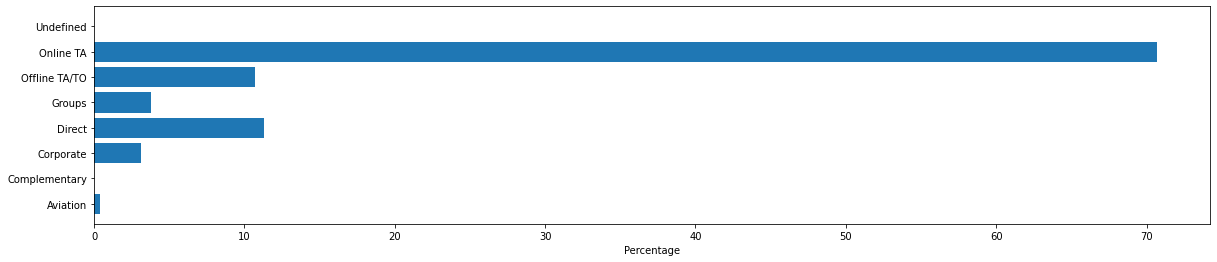

In [ ]:
fig5,ax5=plt.subplots()
total_adr=(pd.Series(city_hotel_segments["City Hotel"].values)/city_hotel_segments["City Hotel"].sum())*100
ax5.barh(city_hotel_segments["City Hotel"].index,total_adr.values)
ax5.xaxis.set_label_text("Percentage")
fig5.set_figwidth(20,20)
fig5.show()

step 3: Calculating ADR for Resort Hotel

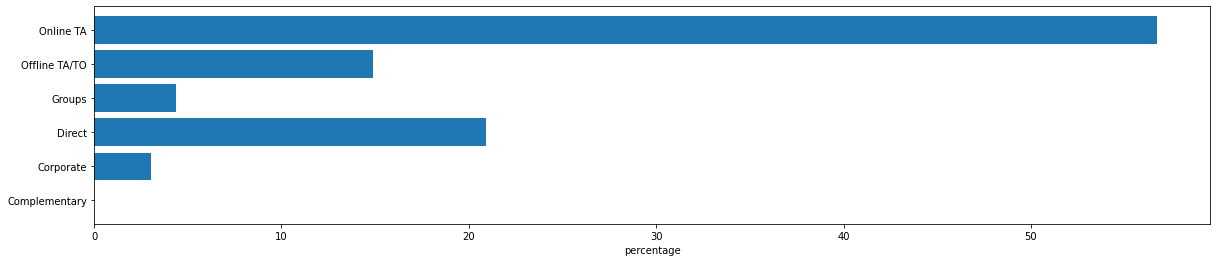

In [ ]:
fig6,ax6=plt.subplots()
resort_hotel_segments  =hotel_booking_df.groupby(["hotel","market_segment"])['adr'].sum()

city_hotel_percentage_series  =  pd.Series( (city_hotel_segments["Resort Hotel"].array/city_hotel_segments["Resort Hotel"].sum()) *100)
ax6.barh(city_hotel_segments["Resort Hotel"].index,city_hotel_percentage_series.values)
ax6.xaxis.set_label_text("percentage")
fig6.set_figwidth(20,20)

fig6.show()


CONCLUSION
>
Total ADR generated from online travel agent is the highest both in the city hotel and the resort hotel. The segment of offline travel agent and direct has a little margin with each other, with direct segment has the higher contribution in resort hotel even though it has lower number of transactions. This give us the top 3 market segments (Online TA, Direct and Online TA/TO), both in term of quantity and profitability. We will focus on this segments for the rest of the analysis.

# Calculating Which Hotel is likely to get Special Request

**Problem Statement:**
>
**being in hotel business is not a cake walk ,as a hotel manager or owner you have to be aware of your customer demand and accordingly making yourself more hospitable to them ,but sometimes customer demand or special request  may cross the border of your avilable services that you can offer to your customer it is suggested to politely refuse the specail requestif you are not able to deliver it but just think how would it be if you know whether or not your hotel is going to get a special reuqest from customers ,No definately I am not joking , it is possible from mere fact that "deeper you go in history farther you gaze into future "-mike maloney**
>

**we will now analyse the probability of specail request based on your hotel type**

In [ ]:
hotel_booking_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

first of all we need to understand we dont need our whole data set here we only need two coloumn from our hotel_bokking_df (DataFrame) these are coloumn of "hotel" and coloumn of "total_special request",to implement this intention we used filter() method of dataframe object of pandas
>
second we need to understand that in the column of "total_special request" these are total special request demand from customer for e.g if I am the coustmer I could make 1,2,3 .... till something  and  these total request this coloumn is showing to us but we need  how many customers threw a special request not how much special request demanded by customers ,subtle difference but impacting ,so for that we will collect all customers which threw greater than 0 special request ,if you  see in code there is varaible "sort_df_by_special_request_truthy" checking the same thing for us 

In [ ]:
filter_df =hotel_booking_df.filter(items=["hotel", "total_of_special_requests"])
sort_df_by_special_request_truthy= filter_df[filter_df["total_of_special_requests"]>0]
special_request_count = sort_df_by_special_request_truthy.groupby(["hotel"])["total_of_special_requests"].count()
total_bookings_done=filter_df.groupby(["hotel"])["total_of_special_requests"].count()
special_request_probability=pd.Series(
[ special_request_count["City Hotel"]/(total_bookings_done["City Hotel"]) ,
 special_request_count["Resort Hotel"]/(total_bookings_done["Resort Hotel"])],
["City Hotel", "Resort Hotel"] )
 











here you can see total special request on hotel basis

In [ ]:
special_request_count

hotel
City Hotel      31373
Resort Hotel    17699
Name: total_of_special_requests, dtype: int64

then we calculate total bookings done and simply use the probability formula for calculating below series

In [ ]:
special_request_probability

City Hotel      0.395475
Resort Hotel    0.441812
dtype: float64

we finish analysing our data here its time to play with graphs

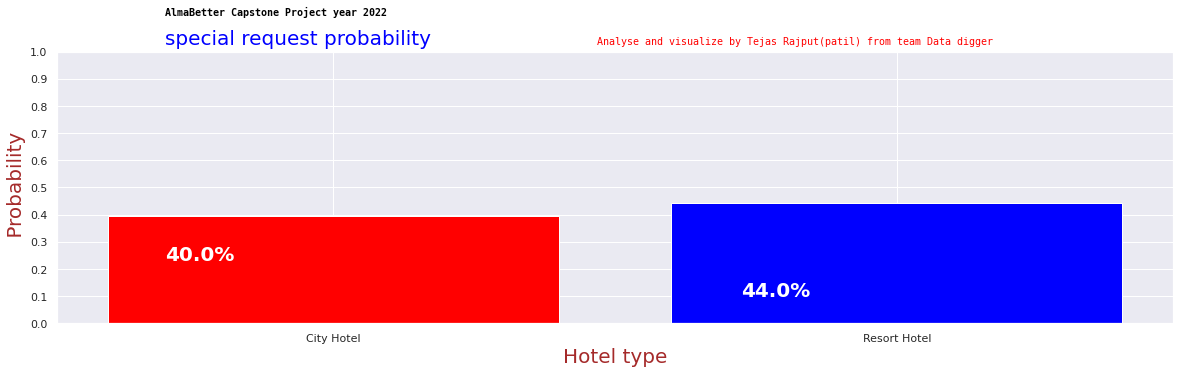

In [ ]:
fig2,plot_special_request_probability=plt.subplots()
plot_srp=plot_special_request_probability.bar(special_request_probability.index,special_request_probability.values,color=["red","blue"])







plot_special_request_probability.title.set_color("red")
plot_special_request_probability.title.set_fontsize(25)
plot_special_request_probability.set_yticks([x/10  for x in range(11)])
text_city_hotel=fig2.text(0.2,0.3,str( np.round(special_request_probability["City Hotel"]*100))+"%"   )
text_resort_hotel=fig2.text(0.6,0.2,str( np.round(special_request_probability["Resort Hotel"]*100))+"%"   )






text_city_hotel.set_fontsize(20)
text_city_hotel.set_color("white")
text_city_hotel.set_fontweight(900)

text_resort_hotel.set_fontsize(20)
text_resort_hotel.set_color("white")
text_resort_hotel.set_fontweight(900)

xaxis_label =plot_special_request_probability.xaxis.set_label_text("Hotel type")
xaxis_label.set_color("brown")
xaxis_label.set_fontsize("20")

yaxis_label =plot_special_request_probability.yaxis.set_label_text(" Probability")
yaxis_label.set_color("brown")
yaxis_label.set_fontsize("20")

fig2.set_figwidth(20)
title_p2=fig2.text(0.2,0.90,"special request probability")
title_p2.set_fontsize(20)
title_p2.set_color("blue")

credit_title_p2=fig2.text(0.5,0.90,"Analyse and visualize by Tejas Rajput(patil) from team Data digger",fontsize=10,fontweight=10,color="red",fontfamily="monospace")

project_detail_p2=fig2.text(0.2,0.98,"AlmaBetter Capstone Project year 2022",fontsize=10,fontweight=900,color="black",fontfamily="monospace")

fig2.show()



















Comprehensive Animation for better understanding
>
Note :Aniamtion rednering may take time patience appreciated

In [ ]:
incr_h=0
def incr(frame):
    global incr_h
    if incr_h> (special_request_count["City Hotel"]/(total_bookings_done["City Hotel"])):
        v2=plot_special_request_probability.properties()["children"][0].set_height( special_request_count["City Hotel"]/(total_bookings_done["City Hotel"]))
    else:
        v2=plot_special_request_probability.properties()["children"][0].set_height(incr_h)

    if incr_h> (special_request_count["Resort Hotel"]/(total_bookings_done["Resort Hotel"]) ):
        plot_special_request_probability.properties()["children"][1].set_height(special_request_count["Resort Hotel"]/(total_bookings_done["Resort Hotel"]))
    else:
      plot_special_request_probability.properties()["children"][1].set_height(incr_h)
    
    incr_h+=0.01

anim_srp=animation.FuncAnimation(fig2 ,incr,interval=100)

In [ ]:
anim_srp

CONCLUSION:
>Note : if your are thinking why these probability is not adding to one 
these are not probablity on the same set of data though event is same 
for e.g probability of getting sepcial request to city hotel is 40.0% then probability of not getting special request would be 60% thier sum will then give you 100% or probability of 1
>
As you can see red bar is indicating probability in percentage of getting specail request to city hotel and blue is indicating probability in percentage of getting specal request to Resort hotel
>Resort Hotel is more Likely to get special request than City Hotel

---------------------------------------------------------end of second problem--------------------------------------

# Which Nationalities Customer Visit Hotel Most ?

problem statement 3:One of the giant from hotel industry APA group wants to open  thier new hotel so they started hiring staff which will asist thier customers and comunicate with them with sheer discpline, before hiring  APA group may want to know what nationalities of customer visit hotel industries most so that they can hire staff acording to the native language of customers

>
how foolish will it be hiring japnese speaking staff to assist customers who dont know japnese !!!!
>
to save APA group from these trouble I will provide better insight of data to them 



In [ ]:
hotel_booking_df=pd.read_csv(path)

In [ ]:
hotel_booking_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

Step 1:By making use of groupby() methods pandas DataFrame we made two groups of hotel and country based on number of country

In [ ]:

country_wise=hotel_booking_df.groupby(["hotel","country"])["country"].count()




In [ ]:
country_wise

hotel         country
City Hotel    ABW          2
              AGO        338
              AIA          1
              ALB          9
              AND          2
                        ... 
Resort Hotel  VEN          3
              VNM          2
              ZAF         18
              ZMB          1
              ZWE          2
Name: country, Length: 291, dtype: int64

step 2: We sort the values by using quick sort(it sorts the data in ascending order) algorithm internally provided by  sort_values() method of pandas and then we take last five values of data to get top 5 most visited nationalities

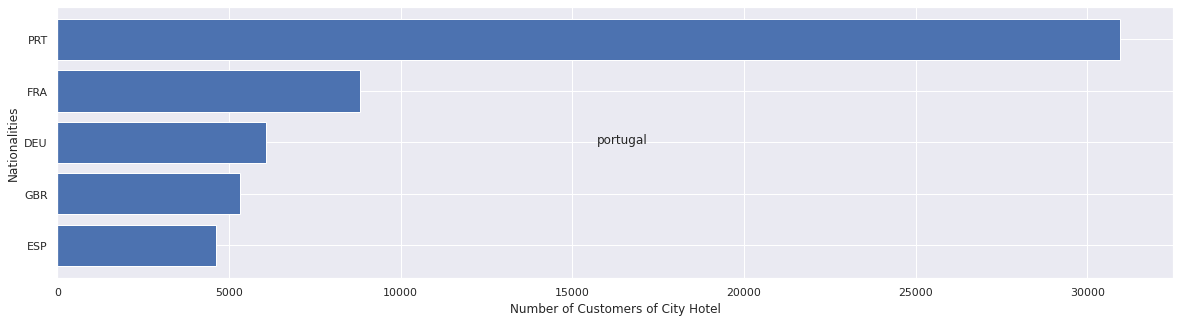

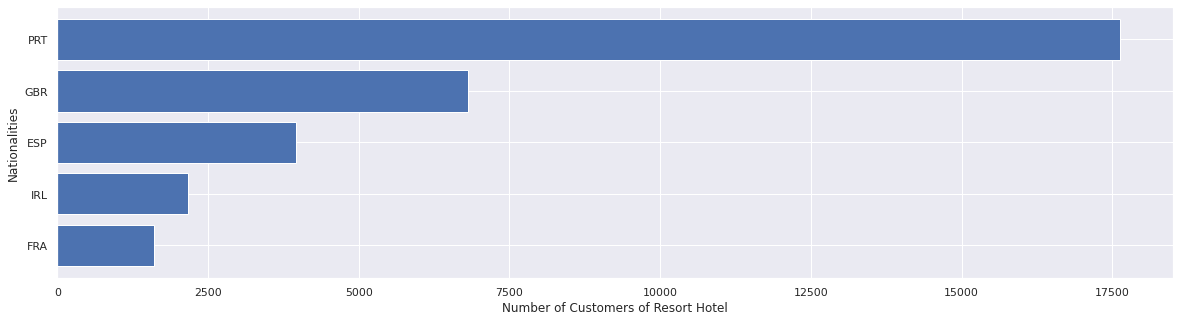

In [ ]:
fig3,ax3=plt.subplots()
fig4,ax4=plt.subplots()

new_df1=country_wise["City Hotel"].sort_values()
gra1=new_df1.tail(5)
ax3.barh(gra1.index,gra1.values)
ax3.yaxis.set_label_text("Nationalities")
ax3.xaxis.set_label_text("Number of Customers of City Hotel")

new_df2=country_wise["Resort Hotel"].sort_values()
gra2=new_df2.tail(5)

ax4.barh(gra2.index,gra2.values)

ax4.yaxis.set_label_text("Nationalities")
ax4.xaxis.set_label_text("Number of Customers of Resort Hotel")
fig3.text(0.5,0.5,"portugal")

fig3.show()
fig4.show()


Top Five most Visited nationalities in city hotel in Descending order are
>
>1)PRT =PORTUGAL
>
>2)FRA = FRANCE
>
>3)DEU = GERMANY
>
>4)GBR = UNITED KINGDOM
>
>5)ESP = SPAIN

>
>
Top Five most Visited nationalities in Resort  hotel in Descending order are
>
>1)PRT =PORTUGAL
>
>2)GBR = UNITED KINGDOM
>
>3)ESP = SPAIN
>
>4)IRL=IRELAND
>
>5)FRA = FRANCE
>



CONCLUSION 
>As you can see from above graphs and tables portugal cutsomers are dominating in both types of hotel ,so we can conclude hiring staff which knows portuguese better would always benifits APA group new hotel ,  and using this data they can also run profitable ad campaigns

-----------------------------------------------------------------------------------end of problem 3-------------------------------------------------------------

#Which days prefer customer stay in hotel?

In [ ]:
#use function to crerate a new column
def total_stay(stays_in_weekend_nights,stays_in_week_nights):
  night_stay=0
  if stays_in_week_nights>0:
    night_stay=stays_in_weekend_nights+stays_in_week_nights

    return night_stay

In [ ]:
hotel_booking_df['night_stay']=hotel_booking_df.apply(lambda x:total_stay(x['stays_in_weekend_nights'], x['stays_in_week_nights']),axis=1)

In [ ]:
hotel_booking_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   
3                        0                     1       1  ...  304.0      0.0   
4                        0                     2       2  ...  240.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out               2015-07-01   
1                          0           Check-Out               2015-07-01   
2                          0           Check-Out               2015-07-02   
3                          0           Check-Out               2015-07-02   
4                          1           Check-Out               2015-07-03   

  night_stay  
0        NaN  
1        NaN  
2        1.0  
3        1.0  
4        2.0  

[5 rows x 33 columns]

Text(0, 0.5, 'count')

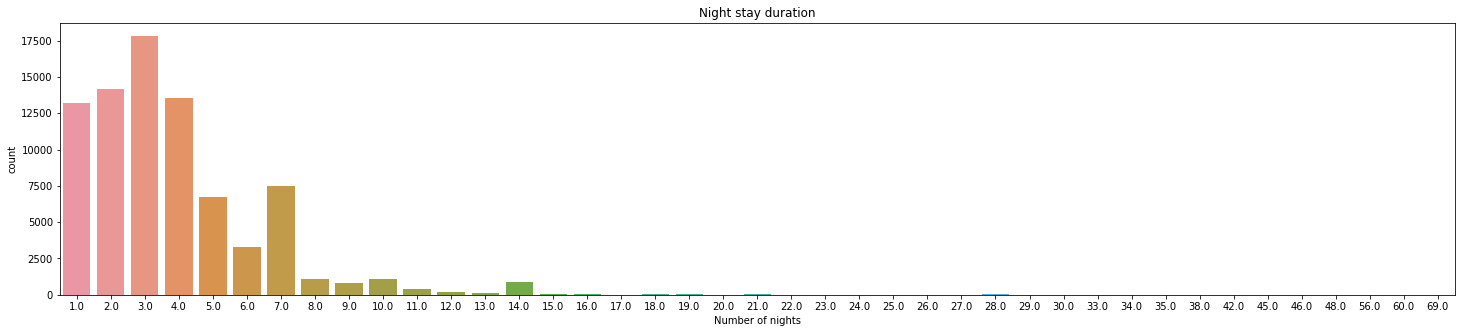

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x=hotel_booking_df['night_stay'])
plt.title('Night stay duration')
plt.xlabel('Number of nights')
plt.ylabel('count')

In [ ]:
from locale import normalize
hotel_booking_df['night_stay'].value_counts(normalize=True)

3.0     0.219766
2.0     0.174758
4.0     0.167226
1.0     0.162800
7.0     0.092704
5.0     0.082953
6.0     0.040225
10.0    0.013215
8.0     0.013092
14.0    0.010590
9.0     0.009603
11.0    0.004524
12.0    0.002416
13.0    0.001640
15.0    0.000851
21.0    0.000678
28.0    0.000419
16.0    0.000407
18.0    0.000296
19.0    0.000271
17.0    0.000247
20.0    0.000173
25.0    0.000173
29.0    0.000160
30.0    0.000160
22.0    0.000148
24.0    0.000074
26.0    0.000074
23.0    0.000062
35.0    0.000062
27.0    0.000049
42.0    0.000049
56.0    0.000025
33.0    0.000025
60.0    0.000012
69.0    0.000012
45.0    0.000012
38.0    0.000012
46.0    0.000012
48.0    0.000012
34.0    0.000012
Name: night_stay, dtype: float64

Conclusion
>Three days stays preffered by most hotel

# Percentage of cancelation in city hotel and resort hotel

Text(0, 0.5, 'Reservation count')

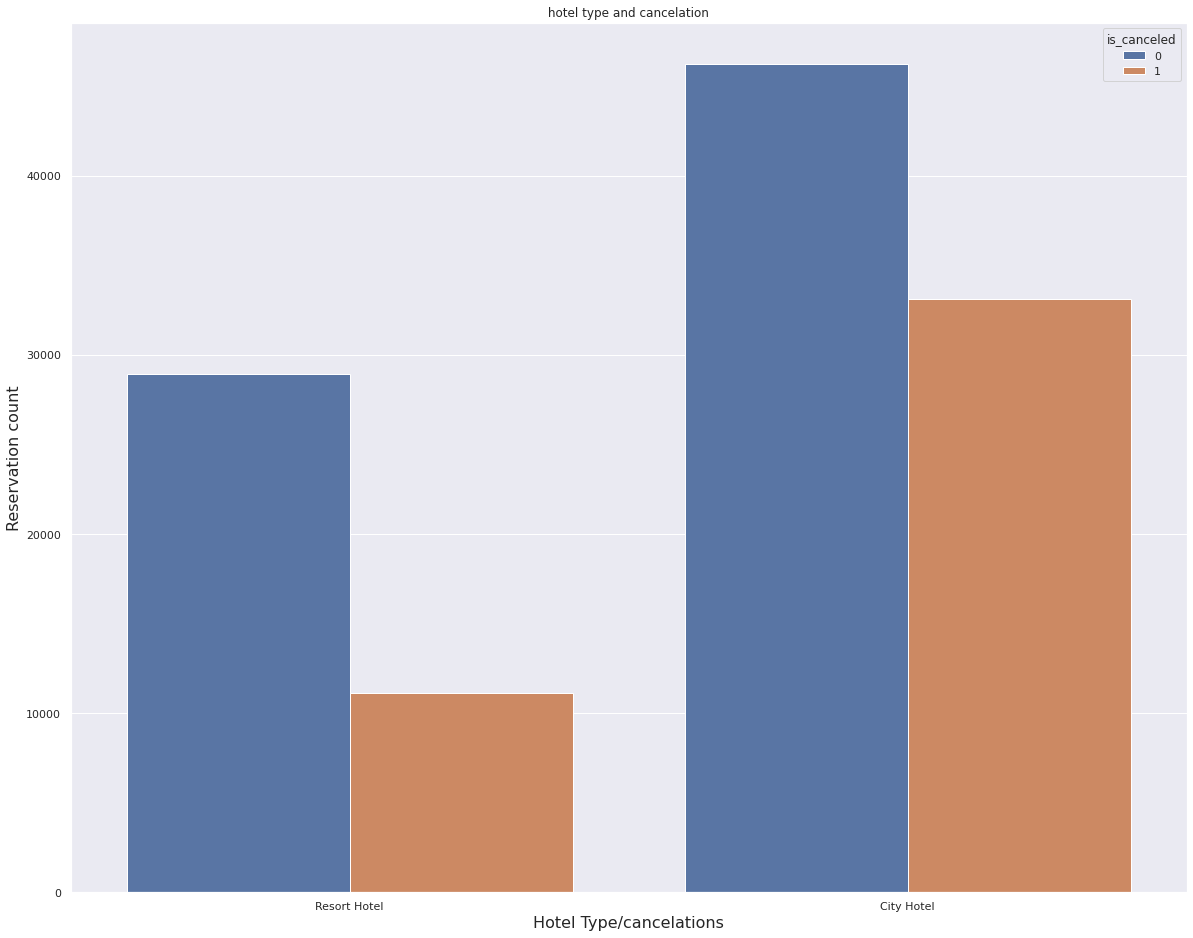

In [ ]:
sns.set(rc={'figure.figsize':(20,16)})
graph=sns.countplot(x='hotel',hue='is_canceled',data=hotel_booking_df)
graph.set(title=' hotel type and cancelation ')
graph.set_xlabel('Hotel Type/cancelations',fontsize=16)
graph.set_ylabel('Reservation count',fontsize=16)


**Conclusion**
>
>Resort Hotels are experiecing more of cancelattion Request than city hotel

#Time Series Analysis on most lucrative market segment Online TA

In [ ]:
filtered_df=hotel_booking_df.filter(["hotel","arrival_date_month","market_segment"])



In [ ]:
filtered_df

hotel arrival_date_month market_segment
0       Resort Hotel               July         Direct
1       Resort Hotel               July         Direct
2       Resort Hotel               July         Direct
3       Resort Hotel               July      Corporate
4       Resort Hotel               July      Online TA
...              ...                ...            ...
119385    City Hotel             August  Offline TA/TO
119386    City Hotel             August      Online TA
119387    City Hotel             August      Online TA
119388    City Hotel             August      Online TA
119389    City Hotel             August      Online TA

[119390 rows x 3 columns]

In [ ]:
onlineta=filtered_df[filtered_df["market_segment"]=="Online TA"]

In [ ]:
onlineta

hotel arrival_date_month market_segment
4       Resort Hotel               July      Online TA
5       Resort Hotel               July      Online TA
8       Resort Hotel               July      Online TA
10      Resort Hotel               July      Online TA
11      Resort Hotel               July      Online TA
...              ...                ...            ...
119382    City Hotel             August      Online TA
119386    City Hotel             August      Online TA
119387    City Hotel             August      Online TA
119388    City Hotel             August      Online TA
119389    City Hotel             August      Online TA

[56477 rows x 3 columns]

In [ ]:
onlineta_customer_accordingto_month=onlineta.groupby(["hotel","arrival_date_month"])["market_segment"].count()

In [ ]:
onlineta_customer_accordingto_month

hotel         arrival_date_month
City Hotel    April                 4102
              August                4980
              December              2104
              February              2514
              January               1892
              July                  4508
              June                  3694
              March                 3526
              May                   4118
              November              1893
              October               2852
              September             2565
Resort Hotel  April                 1384
              August                2930
              December              1104
              February              1198
              January                973
              July                  2581
              June                  1543
              March                 1182
              May                   1497
              November              1022
              October               1210
              September 

**City Hotel**

In [ ]:
onlineta_customer_accordingto_month["City Hotel"]

arrival_date_month
April        4102
August       4980
December     2104
February     2514
January      1892
July         4508
June         3694
March        3526
May          4118
November     1893
October      2852
September    2565
Name: market_segment, dtype: int64

Resort Hotel

In [ ]:
onlineta_customer_accordingto_month["Resort Hotel"]

arrival_date_month
April        1384
August       2930
December     1104
February     1198
January       973
July         2581
June         1543
March        1182
May          1497
November     1022
October      1210
September    1105
Name: market_segment, dtype: int64

plot


In [ ]:
sns.set_theme(style="darkgrid")
#use lineplot
sns.set(rc={'figure.figsize':(20,5) })
plot.yaxis.set_label_text("numberofcustomer")


Text(20.200000000000017, 0.5, 'numberofcustomer')

**Note :Blue line is of City Hotel and Orange Line is of Resort Hotel**

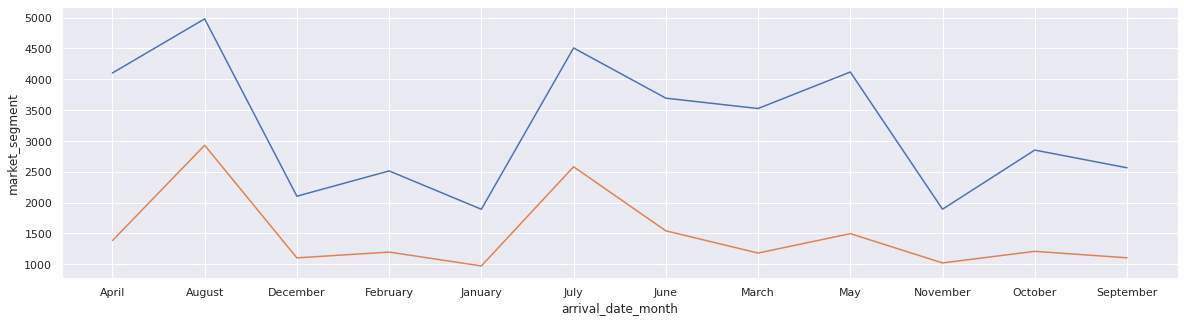

In [ ]:
plot=sns.lineplot(data=onlineta_customer_accordingto_month["City Hotel"])
sns.lineplot(data=onlineta_customer_accordingto_month["Resort Hotel"])

**Conclusion**
>Customers belonging to Online TA segment booking hotel most in month of august an least in month of january>

# What is the percentage distribution of required_car_parking_spaces?

Text(0, 0.5, 'count')

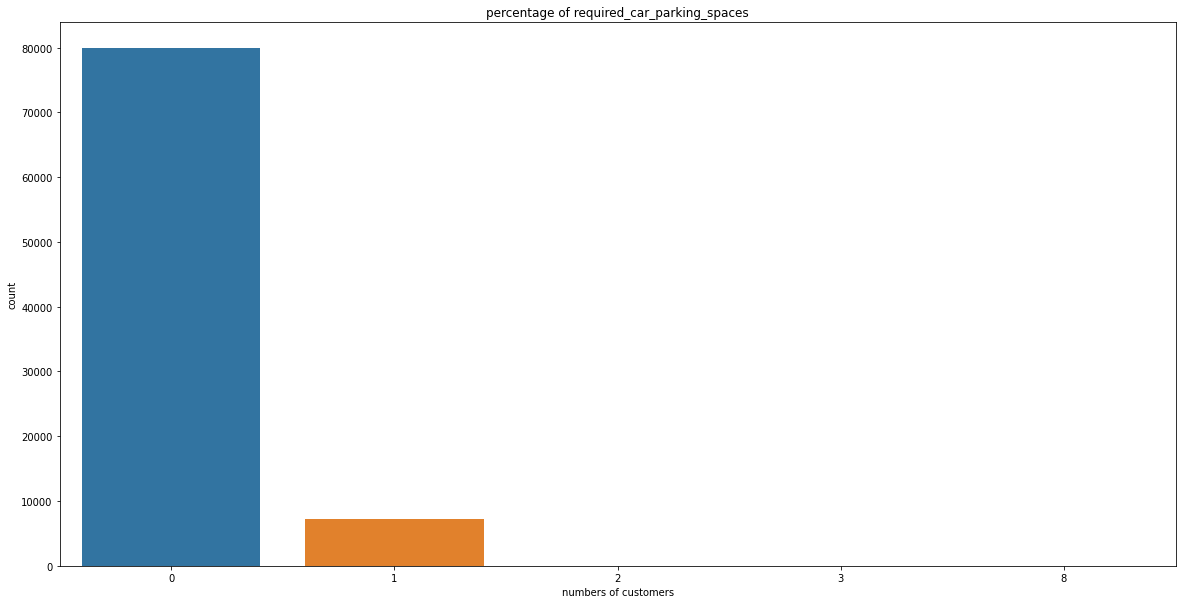

In [ ]:
# required_car_parking_spaces distribution
plt.figure(figsize=(20,10))
sns.countplot(x=hotel_booking_df['required_car_parking_spaces'])
plt.title('percentage of required_car_parking_spaces')
plt.xlabel('numbers of customers')
plt.ylabel('count')

In [ ]:
from locale import normalize
hotel_booking_df['required_car_parking_spaces'].value_counts(normalize=True)

0    0.916244
1    0.083377
2    0.000321
3    0.000034
8    0.000023
Name: required_car_parking_spaces, dtype: float64

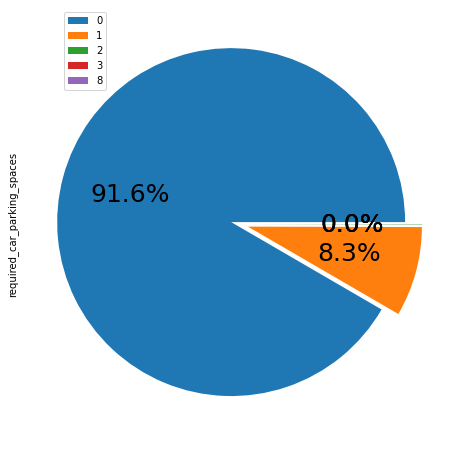

In [ ]:
hotel_booking_df['required_car_parking_spaces'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
labels=hotel_booking_df['required_car_parking_spaces'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.085,1),loc='upper left',labels=labels)

**Conclusion**

93% customers required car parking space

# What type of meal is needed in hotel?

Text(0, 0.5, 'count')

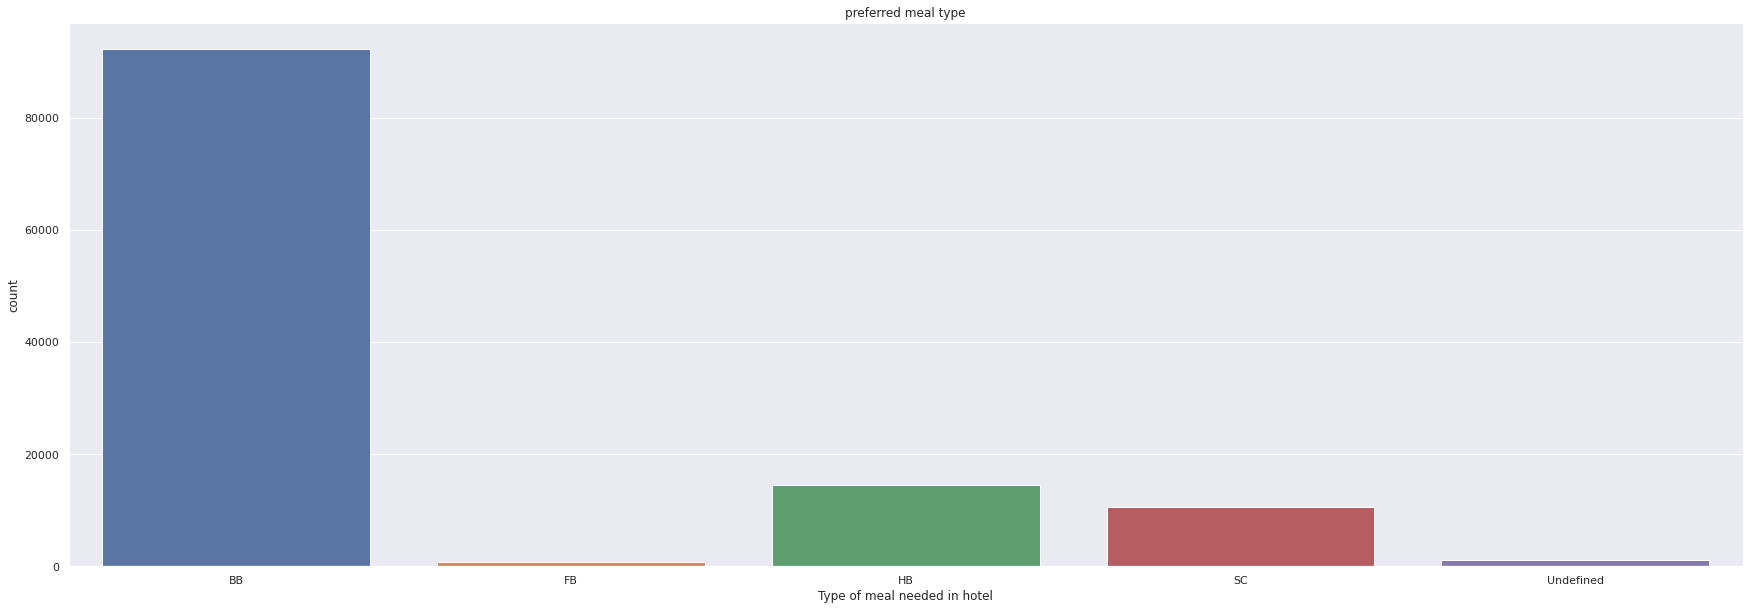

In [ ]:
#use countplot
plt.figure(figsize=(30,10))
sns.countplot(x=hotel_booking_df['meal'])
plt.title('preferred meal type')
plt.xlabel('Type of meal needed in hotel')
plt.ylabel('count')

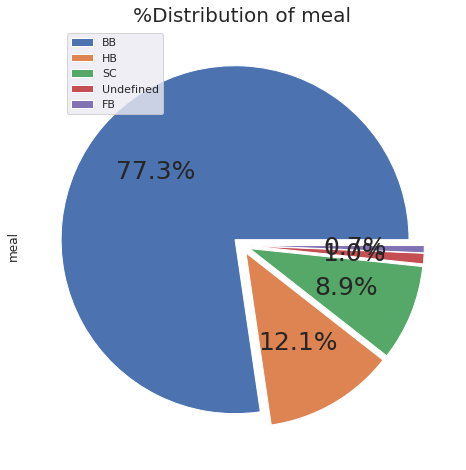

In [ ]:
 left',labels=labels)hotel_booking_df['meal'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
plt.title("%Distribution of meal",fontsize=20)
labels=hotel_booking_df['meal'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.085,1),loc='upper

**Conclusion**

Highly preferable meal type is BB(bed and breakfast) which is required 77.3% and second most is HB(half board) which is required 12.1%

# What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [ ]:
monthly_basis=hotel_booking_df['arrival_date_month'].value_counts()

In [ ]:
monthly_basis

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

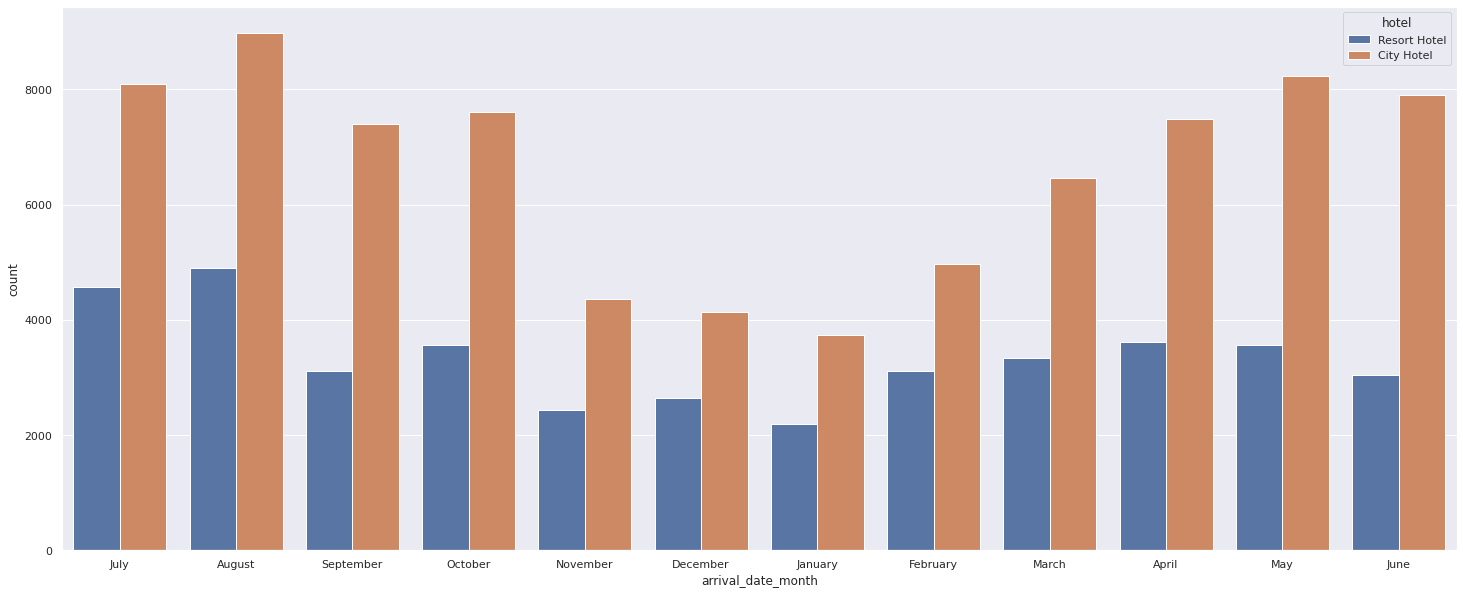

In [ ]:
plt.figure(figsize=(25,10))
plot=sns.countplot(x=hotel_booking_df['arrival_date_month'],hue=hotel_booking_df['hotel'])


#Repeated guest

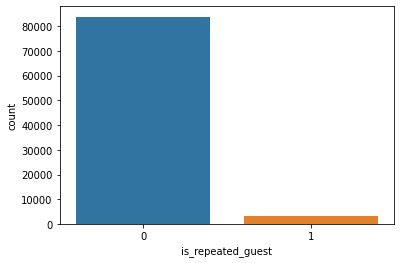

In [ ]:
plot=sns.countplot(data=hotel_booking_df,x="is_repeated_guest")


In [ ]:
total_number_of_repeated_guest=plot.properties()["children"][0].get_height()
total_number_of_not_repeated_guest=plot.properties()["children"][1].get_height()
print(f"{ total_number_of_repeated_guest} are repated guest and {total_number_of_not_repeated_guest} are not repated guest")

83866 are repated guest and 3364 are not repated guest


#Hotel Demand By Market Segment

In [ ]:
multi_index=hotel_booking_df.groupby(["market_segment","is_canceled"])["is_canceled"].count()

**Unstacking Multi Index Series**

In [ ]:
demand_accordingto_market_segment=multi_index.unstack()

In [ ]:
demand_accordingto_market_segment

is_canceled           0        1
market_segment                  
Aviation          185.0     52.0
Complementary     646.0     97.0
Corporate        4303.0    992.0
Direct          10672.0   1934.0
Groups           7714.0  12097.0
Offline TA/TO   15908.0   8311.0
Online TA       35738.0  20739.0
Undefined           NaN      2.0

**lets head towards visualization**

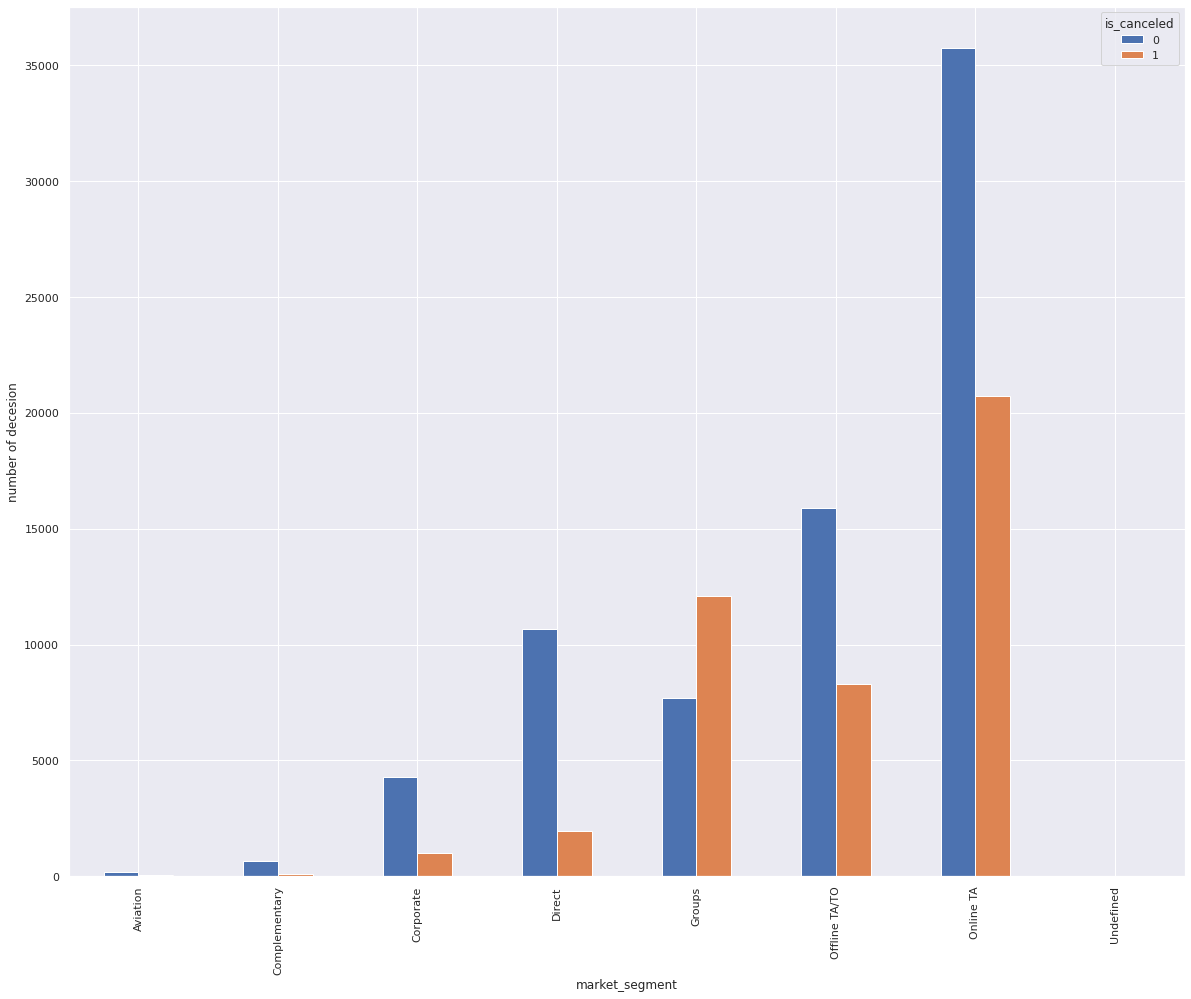

In [ ]:
plot_demand=demand_accordingto_market_segment.plot(kind="bar")
yaxis=plot_demand.yaxis.set_label_text("number of decesion")

**Conclusion**
>
>**Both City Hotel and Resort hotel is in huge demand among customers belonging to market segment of online TA**

#number of arrival in a year and in a day


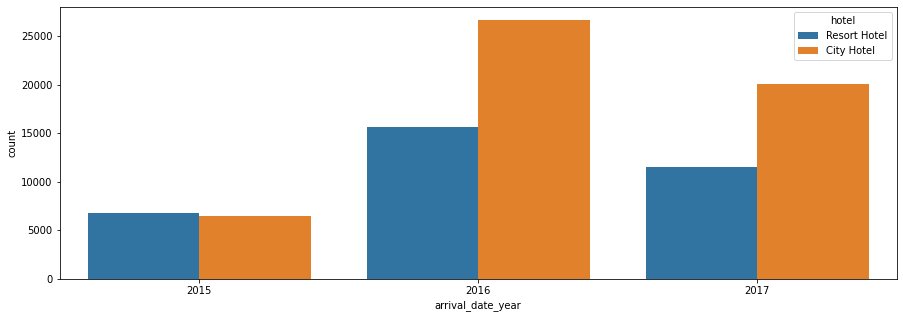

In [ ]:
plt.figure(figsize=(15,5))
list_of_columns= ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
arrival = hotel_booking_df[list_of_columns]
plot=sns.countplot(data = arrival, x = 'arrival_date_year', hue = 'hotel')


Text(0.5, 1.0, 'Graph showing number of arrival per day')

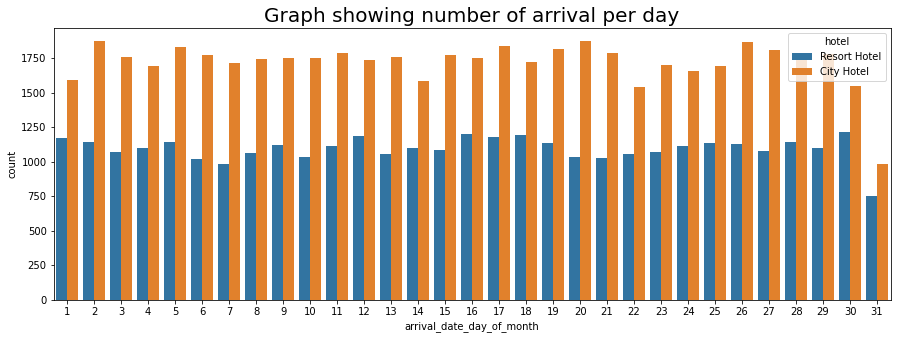

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data =arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

#Total Bookings Canceled in a months of year(2015,2016,2017)

In [ ]:
df_of_only_canceled_bookings=hotel_booking_df[hotel_booking_df["is_canceled"]==1]

In [ ]:
total_bookings_canceled=df_of_only_canceled_bookings.groupby(["arrival_date_month"])["is_canceled"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'number of bookings canceled')

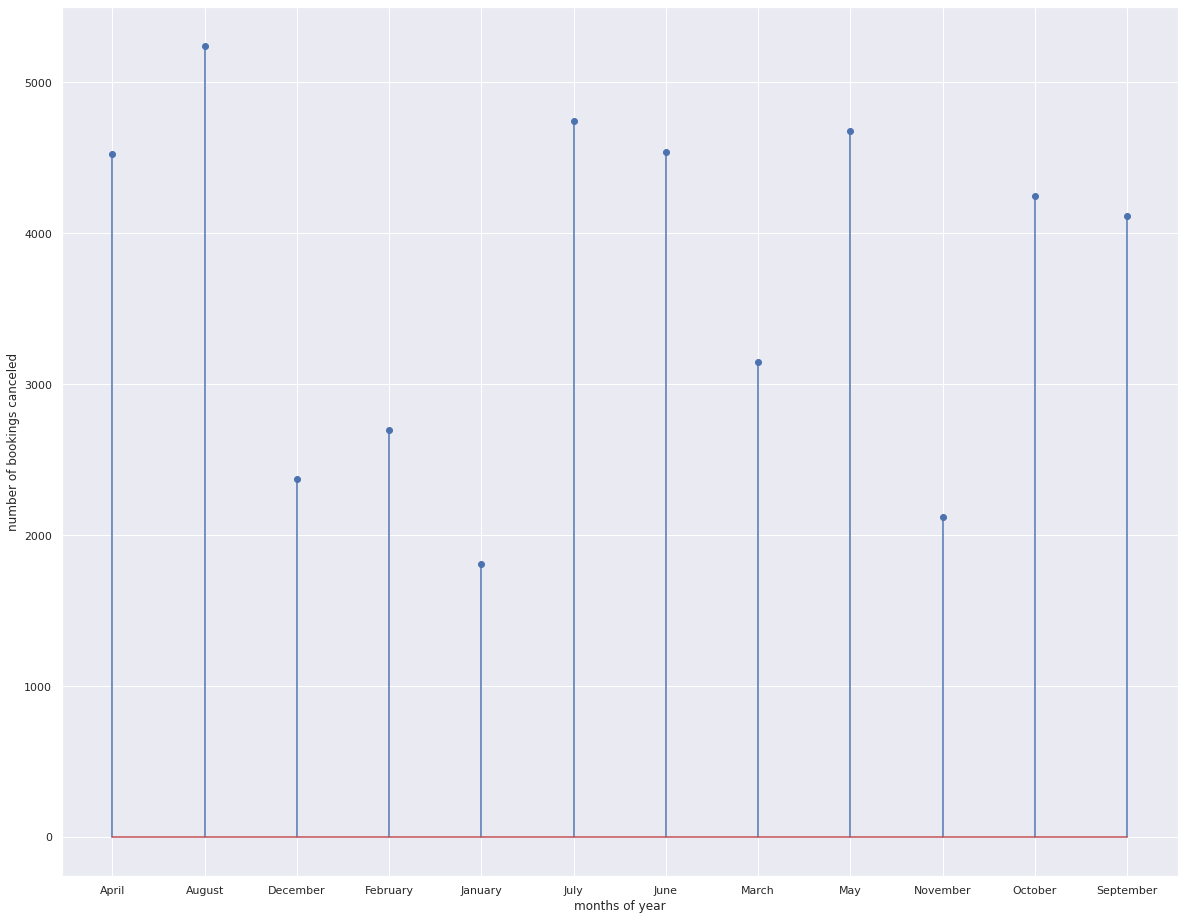

In [ ]:
#viuslization using stem plot 
plt.stem(total_bookings_canceled.index,total_bookings_canceled.values)
plt.xlabel("months of year")
plt.ylabel("number of bookings canceled")

**Conclusion**
>
>As you can see from graph month of august faced most cancellation of bookings adn month in of januray  customers canceled bookings least

#Correlation of the column

Text(0.5, 1.0, 'Co-relation of the columns')

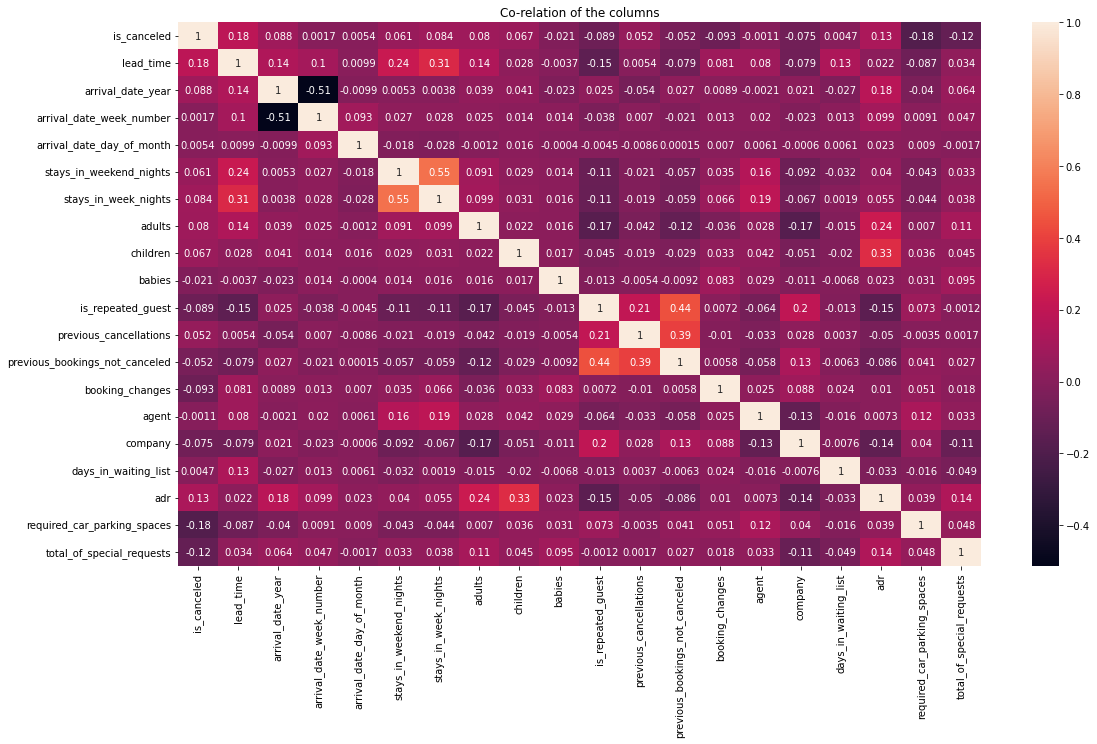

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(hotel_booking_df.corr(),annot=True)
plt.title('Co-relation of the columns')

**Conclusion**
>
>Corelation is measure of strength of realtion between two variables i.e if there is +ve corelation betweeen two variable then the are strongly corelated for e.g if demand is increasing supply is increasing ,and negative corelation specify just vice versa of later example , in this corelation matrix we have corelation between different coloumns of DataFrame and we can compare the two columns based on thier annoted values take "is_cancled" and "lead_time' column
for example you can there is positive corelation between these two columns but not very large 



#**Conclusion Summary**
>
>1)Data consist of 92.62% of adults ,6.85% of children and only 0.53% of babies
>
>2)august is highest traffic experiencing month with whooping 13877 room booking whereas on the other hand we have month of january with relatively low traffic with only 5929 bookings
>
>3)On profitability scale top 3 market segments are Online TA, Direct and Online TA/TO
>4)Resort Hotel is more Likely to get special request than City Hotel
>
>5)portugal cutsomers are dominating in numbers both types of hotel 
>
>6)Three days stays preffered by most hotel
>
>7)Resort Hotels are experiecing more of cancelattion Request than city hotel
>
>8)Customers belonging to Online TA segment booking hotel most in month of august and least in month of january>
>
>9)93% customers required car parking space
>
>10)Highly preferable meal type is BB(bed and breakfast) which is required 77.3% and second most is HB(half board) which is required 12.1%
>
>11)Highly disproprtionate special requesst is coming in month of june ,in which huge share of special reuest goes to city hotel and very low share to resort hotel
>
>12)83866 are repated guest and 3364 are not repated guest
>
>13)Both City Hotel and Resort hotel is in huge demand among customers belonging to market segment of online TA
>
>14)from first graph we can say in year 2015 number of arrivals were same but in next year 2016 city hotel ovrtake the resort hotel and in year 2017 same trend continues
>
>
>15)As you can see from graph month of august faced most cancellation of bookings adn month in of januray customers canceled bookings least
>
>16)Corelation is measure of strength of realtion between two variables i.e if there is +ve corelation betweeen two variable then the are strongly corelated for e.g if demand is increasing supply is increasing ,and negative corelation specify just vice versa of later example , in this corelation matrix we have corelation between different coloumns of DataFrame and we can compare the two columns based on thier annoted values take "is_cancled" and "lead_time' column for example you can there is positive corelation between these two columns but not very large

>